## Data Analysis

In [1]:
# Importing all the required libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) + {'the','between','to','is','it'}
pd.options.display.max_colwidth = None
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [2]:
# Importing the training data
df = pd.read_csv('train.csv').set_index('id')
df.head()

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


#### 1.1 Data size

In [3]:
df.shape

(404290, 5)

There are a total of 404290 labelled pairs of questions in the dataset. Each question has a corresponding question id.

#### 1.2 Determining if the dataset is balanced or unbalanced

Count of values 0 and 1 is as follows 
0    255027
1    149263
Name: is_duplicate, dtype: int64

Percentage of values 0 and 1 is as follows 
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


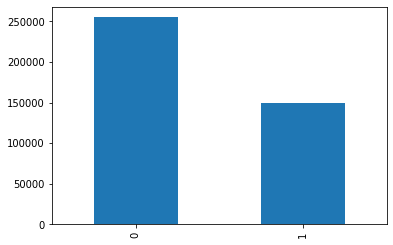

In [4]:
# Checking for the number of target values and their corresponding counts
print(f'Count of values 0 and 1 is as follows \n' + str(df.is_duplicate.value_counts()))
print(f'\nPercentage of values 0 and 1 is as follows \n' + str(100*(df.is_duplicate.value_counts()/len(df.is_duplicate)) ))
df.is_duplicate.value_counts().plot(kind='bar')

The dataset is unbalanced as the target variable contains two classes with one contributing 63% of total elements and the other containing 37% of remaining class values.

#### 1.3 Inspecting for null values in the dataset

In [5]:
# Counting the number of null values in dataset
df.isnull().sum()

qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

There are two null values in question2 column and 1 in question1 column

In [6]:
# Printing the records where the question1 column is null
df[df['question1'].isnull()]

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English name is most suitable for me considering the pronounciation of my Chinese name?,0


In [7]:
# Printing the records where the question2 column is null
df[df['question2'].isnull()]

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
105780,174363,174364,How can I develop android app?,NaN,0
201841,303951,174364,How can I create an Android app?,NaN,0


As the target values for all those rows containing null values is '0' indicating that they are non-duplicate, we can drop those rows as they are in surplus.

#### 1.4 Inspecting for duplicate rows 

In [8]:
# Checking for duplicate entries in the dataset
print(df.duplicated(subset=['qid1', 'qid2']).sum())
print(df.duplicated(subset=['question1', 'question2']).sum())

0
0


There are no duplicate records where same pair of questions or question ids is repeated.

In [9]:
# The number of unique questions in qid1 column
print(f"The number of unique question ids in qid1 column is {df.duplicated(subset=['qid1']).sum()}")
# The number of unique questions in question 1 column
print(f"The number of unique questions in question1 column is {df.duplicated(subset=['question1']).sum()}")

The number of unique question ids in qid1 column is 113636
The number of unique questions in question1 column is 113833


Here, the number of unique question ids is smaller than the number of unique questions. Ideally, this number should have been the same because for every question there is a corresponding question id. This inequality in the number of question ids and number of questions implies that there are some formating issues like extra space or different case of text in question1 column. <br>
This highlights the need for below preprocessing : 
1. Removal of trailing spaces in question1 column
2. Converting the text in smaller or upper case.

In [10]:
# The number of unique questions in qid2 column
print(f"The number of unique question ids in qid2 column is {df.duplicated(subset=['qid2']).sum()}")
# The number of unique questions in question 2 column
print(f"The number of unique questions in question2 column is {df.duplicated(subset=['question2']).sum()}")

The number of unique question ids in qid2 column is 104926
The number of unique questions in question2 column is 105115


Analysis similar to that of qid1 and question1 can be deduced for qid2 and question2 columns. It leads us to the same conclusion as before.

In [11]:
# Finding how common the questions are in the dataset
questions_list = list(df.question1) + list(df.question2)
questions_list = [x for x in questions_list if str(x) != 'nan']
print(f"Total number of instances of questions in dataset is {len(questions_list)} which is actually made by repeating {len(set(questions_list))} questions")

Total number of instances of questions in dataset is 808577 which is actually made by repeating 537360 questions


#### 1.5 Analysing the number of words in question1 and question2

Let's check the distribution of number of words in question1 and question2 to find if they are similar or not

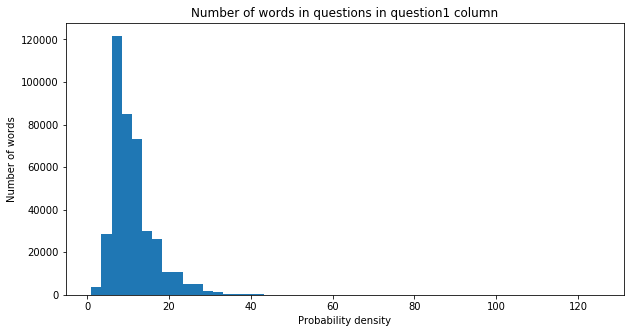

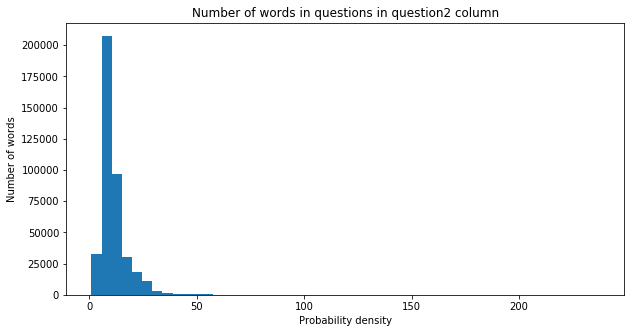

In [32]:
question1_word_len = [ len(question.split()) for question in list(df.question1.values) if type(question) == str ]
plt.figure(figsize=(10,5))
plt.hist(question1_word_len, bins=50)
plt.xlabel('Probability density')
plt.ylabel('Number of words')
plt.title('Number of words in questions in question1 column')
plt.show()

question2_word_len = [ len(question.split()) for question in list(df.question2.values) if type(question) == str ]
plt.figure(figsize=(10,5))
plt.hist(question2_word_len, bins=50)
plt.xlabel('Probability density')
plt.ylabel('Number of words')
plt.title('Number of words in questions in question2 column')
plt.show()

The distribution of number of words in question1 column and question2 column is almost the same. They seem to be following the same distribution in terms of number of words in them.

#### 1.6 Analysing the words in question1 and question2  columns

In [47]:
# reference : https://www.geeksforgeeks.org/generating-word-cloud-python/
def generateWordCloud(questionsList):
    wordsList = []
    for question in questionsList : 
        if type(question) == str : 
            question = question.lower().split()
            wordsList.extend(question)
            
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                    min_font_size = 10).generate(' '.join(wordsList))

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

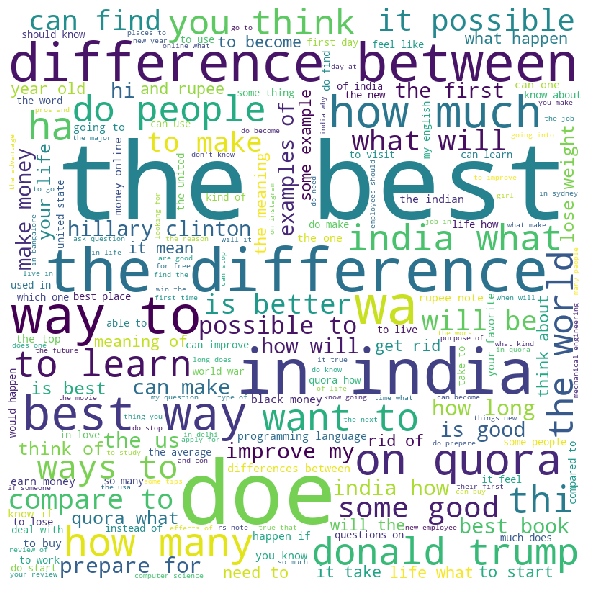

In [48]:
generateWordCloud(df.question1.values)

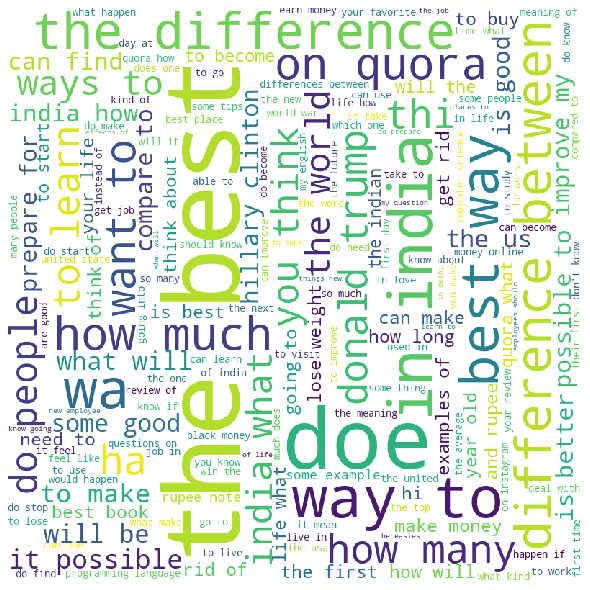

In [49]:
generateWordCloud(df.question2.values)

As evident from the word clouds above, the words observed in question1 and question2 are almost the same. 

### Conclusions of Data Analysis

1. The dataset is unbalanced. The distribution of different labels in target class is 63%-37%. Therefore, prior to building machine learning model, the dataset needs to be balanced or choose a performance metrics that remains unaffected due to imbalanced in the dataset.

2. Dataset contains null values which need to be dealt with in the preprocessing stage. 

3. Same questions are present with minor change in formatting like trailing spaces. This needs to be dealt with in the preprocessing stage.

4. There are no duplicate records wherein the pair of questions is same in two records. 

5. The distribution of number of words found in question 1 and question 2 is almsot the same. Similarly, the words found in question 1 and quesiton 2 columns too are the same.